# Logistic Regression

## Part 1 - Data Preprocessing

### Importing the dataset

In [50]:
import pandas as pd
dataset = pd.read_csv('Wine.csv')

In [51]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [52]:
dataset.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


### Getting the inputs and output

In [53]:
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [54]:
X

array([[ 0.7 ,  0.  ,  1.9 , ...,  0.56,  9.4 ,  5.  ],
       [ 0.88,  0.  ,  2.6 , ...,  0.68,  9.8 ,  5.  ],
       [ 0.76,  0.04,  2.3 , ...,  0.65,  9.8 ,  5.  ],
       ...,
       [ 0.24,  0.19,  1.2 , ...,  0.46,  9.4 ,  6.  ],
       [ 0.29,  0.3 ,  1.1 , ...,  0.38, 12.8 ,  7.  ],
       [ 0.21,  0.38,  0.8 , ...,  0.32, 11.8 ,  6.  ]])

In [55]:
y

array([0, 0, 0, ..., 1, 1, 1])

### Creating the Training Set and the Test Set

In [56]:
# scikitlearn is a library
# model_selection is a module
# train_test_split is a function

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [57]:
X_train

array([[ 0.61,  0.12,  1.3 , ...,  0.37, 13.5 ,  5.  ],
       [ 0.28,  0.4 , 22.  , ...,  0.5 ,  8.7 ,  5.  ],
       [ 0.22,  0.2 , 16.  , ...,  0.46,  8.9 ,  6.  ],
       ...,
       [ 0.2 ,  0.59,  0.9 , ...,  0.38,  9.1 ,  6.  ],
       [ 0.22,  0.37,  1.2 , ...,  0.55, 10.3 ,  7.  ],
       [ 0.22,  0.42,  2.3 , ...,  0.43, 10.  ,  5.  ]])

In [58]:
X_test

array([[ 0.18,  0.24,  3.4 , ...,  0.52,  9.2 ,  6.  ],
       [ 0.14,  0.18,  1.4 , ...,  0.54, 11.2 ,  6.  ],
       [ 0.22,  0.5 , 13.7 , ...,  0.66,  9.  ,  6.  ],
       ...,
       [ 0.4 ,  0.16,  1.8 , ...,  0.74, 10.1 ,  7.  ],
       [ 0.29,  0.27,  1.7 , ...,  0.51, 12.6 ,  7.  ],
       [ 0.32,  0.33,  1.4 , ...,  0.51, 12.8 ,  7.  ]])

In [59]:
y_train

array([1, 1, 1, ..., 1, 1, 1])

In [60]:
y_test

array([1, 1, 1, ..., 0, 1, 1])

### Feature Scaling

In [61]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [62]:
X_train

array([[ 1.62840579, -1.37139198, -0.87949695, ..., -1.08058342,
         2.54358014, -0.93898191],
       [-0.36431058,  0.559013  ,  3.55869262, ..., -0.21342386,
        -1.50676707, -0.93898191],
       [-0.72662265, -0.8198477 ,  2.27226086, ..., -0.48024218,
        -1.3380026 ,  0.20895716],
       ...,
       [-0.84739334,  1.86893066, -0.96525907, ..., -1.01387884,
        -1.16923813,  0.20895716],
       [-0.72662265,  0.35218389, -0.90093748, ...,  0.12009905,
        -0.15665133,  1.35689623],
       [-0.72662265,  0.69689907, -0.66509166, ..., -0.68035593,
        -0.40979803, -0.93898191]])

## Part 2 - Building and training the model

### Building the model

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)

### Training the model

In [63]:
model.fit(X_train, y_train)

LogisticRegression()

### Inference

Making the predictons of the data points in the test set

In [64]:
y_pred = model.predict(sc.transform(X_test))

In [65]:
y_pred

array([1, 1, 1, ..., 0, 1, 1])

In [66]:
y_test

array([1, 1, 1, ..., 0, 1, 1])

Making the prediction of a single data point with:

1. Fixed Acidity = 6.1
2. Volatile Acidity = 0.41
3. Citric Acidity = 0.24
4. Residual Sugar = 1.6
5. Chlorides = 0.049
6. Free Sulfur Dioxide = 16
7. Total Sulfur Dioxide = 137
8. Density = 0.993
9. pH = 3.32
10. Sulphates = 0.5
11. Alcohol = 10.4
12. Quality = 6
13. Color = ?

In [67]:
# Standardize the new data point using the previously fitted scaler
# Make a prediction for the new data point
# Print the prediction

data_point = [[6.1, 0.41, 0.24, 1.6, 0.049, 16, 137, 0.993, 3.32, 0.5, 10.4]]
data_point_scaled = sc.transform(data_point)
prediction = model.predict(data_point_scaled)
print(f"Predicted color for the new data point: {'red' if prediction[0] == 1 else 'white'}")


Predicted color for the new data point: white


## Part 3: Evaluating the model 

### Confusion Matrix

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[308,   3],
       [  5, 984]])

### Accuracy

In [28]:
(308+984)/(308+984+3+5)

0.9938461538461538

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9938461538461538

#### Results Chart

       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

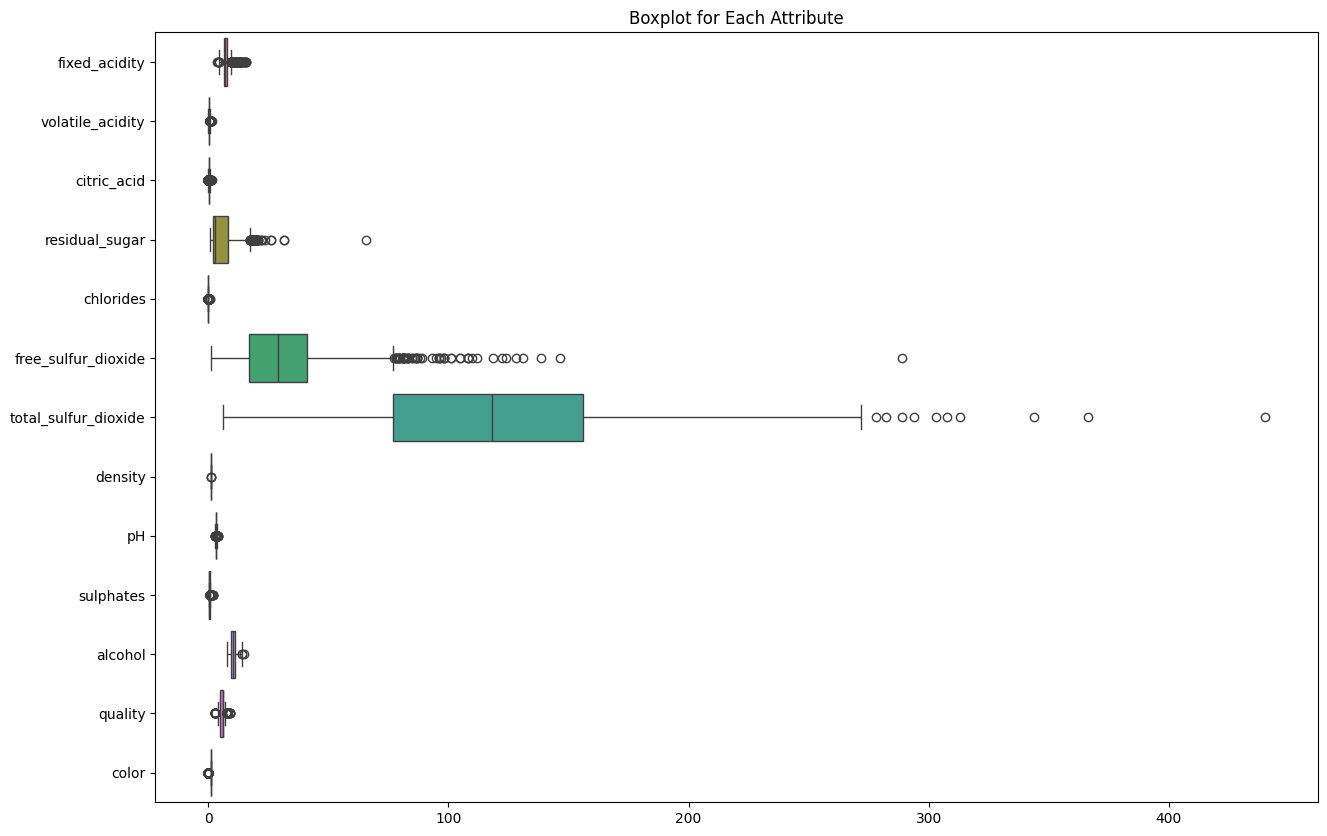

In [12]:
# Display descriptive statistics
# Set up the matplotlib figure
# Create a boxplot for each attribute

import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('Wine.csv', encoding='ascii')
print(dataset.describe())
plt.figure(figsize=(15, 10))
sns.boxplot(data=dataset, orient='h')
plt.title('Boxplot for Each Attribute')
plt.show()